Firstly we will import the required python libraries.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

now we put the mean in 0% to 200%,for example, 100% and standard deviation and size of the data set.

In [55]:
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

now we will create a random dataset in normal distribution curve

In [56]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

Then we will use the historical data and the respective probaility of data and create a random table with repect to both.

In [57]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

With the above data we will create a pandas dataframe.

In [58]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

And we will create a function to map the results from the input value from the randomized values.

In [59]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

Now we can loop the results until the specific amount confidence is reached with the data.

In [60]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

now we summarise the results from our created data.

In [61]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [62]:
results_df.describe().style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,683,051.5","2,857,625.891","83,671,600.0"
std,"2,765,380.283810288","105,323.99481634368","2,710,509.23265358"
min,"75,157,000.0","2,571,620.0","74,975,000.0"
25%,"81,773,000.0","2,783,407.5","81,793,750.0"
50%,"83,638,875.0","2,857,778.5","83,550,000.0"
75%,"85,524,875.0","2,929,190.0","85,556,250.0"
max,"91,945,750.0","3,256,620.0","92,125,000.0"


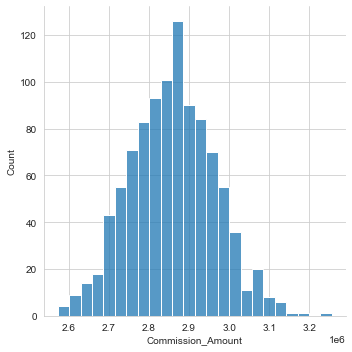

In [64]:
sns.displot(results_df['Commission_Amount'])